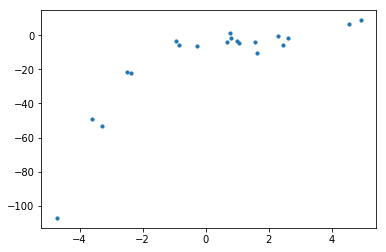

In [2]:
# To understand the need for polynomial regression, let’s generate some random dataset first.
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [3]:
# Above is data generated
 # Let’s apply a linear regression model to this dataset.

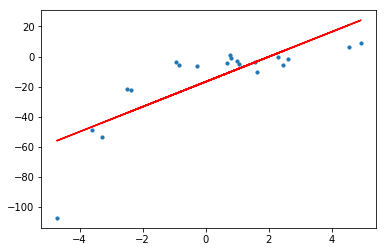

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

# The plot of the best fit line is

# Underfitting

In [5]:
# We can see that the straight line is unable to capture the patterns in the data. 
# This is an example of under-fitting. 
# Computing the RMSE and R²-score of the linear line gives:

RMSE of linear regression is 15.908242501429998


R2 score of linear regression is 0.6386750054827146

To overcome under-fitting, we need to increase the complexity of the model.

To generate a higher order equation we can add powers of the original features as new features. The linear model, 





![lin_reg](lin_reg1.png)

can be transformed to

![lin_reg](lin_reg2.png)

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. 

x² is only a feature. 

However the curve that we are fitting is quadratic in nature.

In [6]:
# To convert the original features into their higher order terms we will 
#use the PolynomialFeatures class provided by scikit-learn. 
#Next, we train the model using Linear Regression.

3.449895507408724
0.9830071790386679


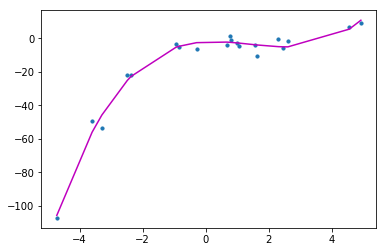

In [8]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [9]:
# Fitting a linear regression model on the transformed features gives the abovew plot.


It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. Computing the RMSE and R²-score of the quadratic plot gives:

RMSE of polynomial regression is 10.120437473614711

R2 of polynomial regression is 0.8537647164420812

### We can see that RMSE has decreased and R²-score has increased as compared to the linear line.

If we try to fit a cubic curve (degree=3) to the dataset, we can see that it passes through more data points than the quadratic and the linear plots.

RMSE is 3.449895507408725

R2 score is 0.9830071790386679

In [10]:
# Below is a comparison of fitting linear, quadratic and cubic curves on the dataset.
![title](cube2.png) # refer to slides

/bin/sh: -c: line 0: syntax error near unexpected token `cube2.png'
/bin/sh: -c: line 0: `[title](cube2.png) # refer to slides'
